<a href="https://colab.research.google.com/github/vvrgit/FDP-NNDL/blob/main/Image_Classification_Using_CNN_Custom_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import Libraries

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2

import numpy as np
import pandas as pd

import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from keras import models
from keras.models import Sequential
from keras.models import load_model

from keras.layers import Input, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense
from keras.callbacks import Callback, ModelCheckpoint
from tensorflow.keras.optimizers import RMSprop,Adadelta,SGD,Adagrad,Adam
from keras.applications.vgg16 import preprocess_input

import warnings
warnings.filterwarnings('ignore')

# Training Parameters

In [3]:
img_width, img_height = 150, 150
input_shape = (img_height, img_width, 3)
nb_train_samples = 4
nb_val_samples = 4
nb_epochs = 10
num_classes=2

#Image Pre-Processing

In [5]:
train_data_dir = '/content/drive/MyDrive/NNDL-Data/train'
val_data_dir = '/content/drive/MyDrive/NNDL-Data/validation'

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_width, img_height),
                                                    batch_size=1, class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(val_data_dir, target_size=(img_width, img_height),
                                                        batch_size=1,class_mode='categorical')

Found 4 images belonging to 2 classes.
Found 4 images belonging to 2 classes.


#Build CNN Model

In [21]:
model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', padding='valid',strides=1, input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='valid',strides=1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 148, 148, 8)       224       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 74, 74, 8)         0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 72, 72, 16)        1168      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 36, 36, 16)        0         
 ng2D)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 20736)             0         
                                                                 
 dense_10 (Dense)            (None, 32)               

#Compile The Model

In [8]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

In [9]:
model_checkpoint_callback = keras.callbacks.ModelCheckpoint("best_Model.h5",save_best_only=True)

# CNN Model Training

In [10]:
history = model.fit_generator( train_generator, callbacks = model_checkpoint_callback,epochs=nb_epochs, validation_data=validation_generator,verbose=1)
print('Training Completed!')
print(history.history.keys())

Epoch 1/10
4/4 [==============================] - 4s 828ms/step - loss: 2.8764 - accuracy: 0.2500 - val_loss: 0.7243 - val_accuracy: 0.5000
Epoch 2/10
4/4 [==============================] - 0s 49ms/step - loss: 2.6061 - accuracy: 0.5000 - val_loss: 2.6045 - val_accuracy: 0.5000
Epoch 3/10
4/4 [==============================] - 0s 47ms/step - loss: 2.0573 - accuracy: 0.5000 - val_loss: 1.0905 - val_accuracy: 0.5000
Epoch 4/10
4/4 [==============================] - 0s 56ms/step - loss: 0.3853 - accuracy: 0.7500 - val_loss: 0.6708 - val_accuracy: 0.7500
Epoch 5/10
4/4 [==============================] - 0s 44ms/step - loss: 0.5194 - accuracy: 0.7500 - val_loss: 0.7410 - val_accuracy: 0.5000
Epoch 6/10
4/4 [==============================] - 0s 61ms/step - loss: 0.4048 - accuracy: 0.7500 - val_loss: 0.6673 - val_accuracy: 0.5000
Epoch 7/10
4/4 [==============================] - 0s 54ms/step - loss: 0.2080 - accuracy: 1.0000 - val_loss: 0.6031 - val_accuracy: 0.5000
Epoch 8/10
4/4 [==========

#Classification With Trained CNN Model

In [13]:
img_path = '/content/drive/MyDrive/cat.jpg'
label = ['Cat','Dog']
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)
thresholded = (features>0.5)*1
ind = np.argmax(thresholded)
print('Predicted Array:',thresholded)
print('Predicted Label:',label[ind])

1/1 [==============================] - 0s 312ms/step
Predicted Array: [[1 0]]
Predicted Label: Cat


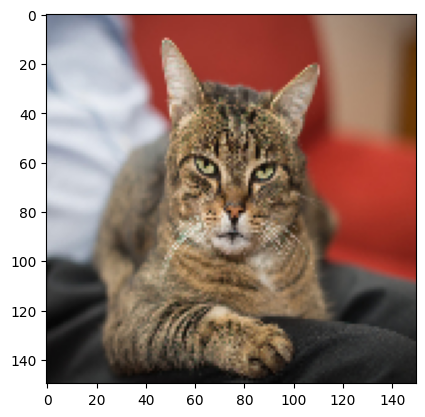

In [14]:
imgplot = plt.imshow(img)
plt.show()

In [15]:
model = load_model('/content/best_Model.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 16)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 20736)             0         
                                                                 
 dense (Dense)               (None, 32)                6

In [16]:
img_path = '/content/drive/MyDrive/cat.jpg'
label = ['Cat','Dog']
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)
thresholded = (features>0.5)*1
ind = np.argmax(thresholded)
print('Predicted Array:',thresholded)
print('Predicted Label:',label[ind])

1/1 [==============================] - 0s 268ms/step
Predicted Array: [[1 0]]
Predicted Label: Cat


# **Thank You**